<a href="https://colab.research.google.com/github/engmahaq8/The_AI_Engineer/blob/main/K_means_clustering_project_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the dataset
customer_data = pd.read_csv("/content/drive/MyDrive/The AI Engineer /unsupervised learning /Mall_Customers.csv")



#check for null or missing values
customer_data.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#read the data
customer_data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let’s look at the data and see how it is distributed:

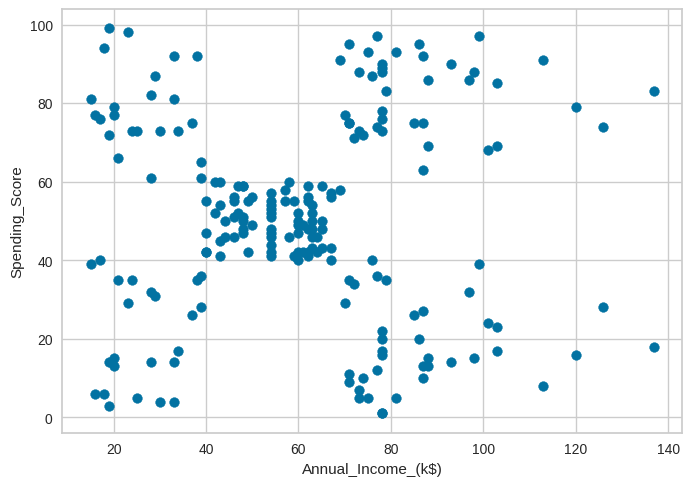

In [12]:
#scatter plot for annual income on the x axis and spending score on the y access
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()



  **From the above scatterplot, it is difficult to tell if there is any pattern in the dataset. This is where clustering will help. **

`First, we will Initialize centroids randomly:`

```

```



In [13]:
#TODO: RUN IT 10 TIMES TO See  THAT WE WILL HAVE DIFFERENT CENTROIS
#BECAUSE WE ARE TAKING THE .SAMPLE FUNCTION.
#The sample function provides random values
K=3
centroids = customer_data.sample(n=K) #get random k centroids
print(centroids.head())

     CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
124         125  Female   23                  70              29
139         140  Female   35                  74              72
104         105    Male   49                  62              56


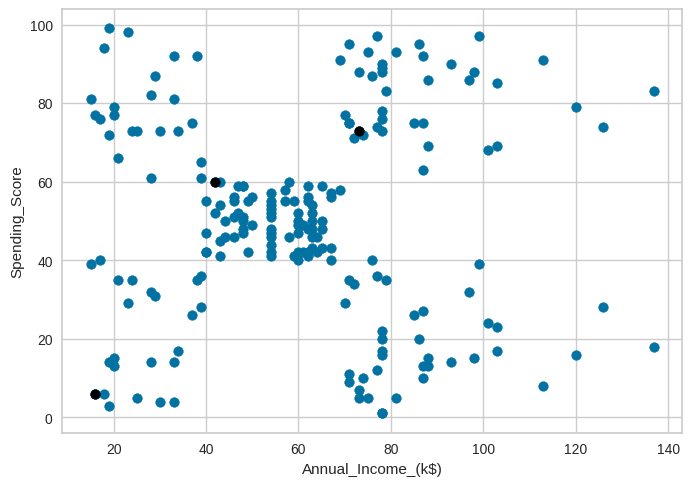

In [14]:
#TODO: RUN IT 10 TIMES TO See  THAT WE WILL HAVE DIFFERENT CENTROIS
#BECAUSE WE ARE TAKING THE .SAMPLE FUNCTION.
#The sample function provides random values
K=3
centroids = customer_data.sample(n=K) #get random k centroids
plt.scatter(customer_data['Annual_Income_(k$)'], customer_data['Spending_Score'] ) #scatter plot for data points
plt.scatter( centroids['Annual_Income_(k$)'] , centroids['Spending_Score'] ,c='black') #scatter plot for centroids
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

Next, we will iterate through each centroid and data point, calculate the distance between them, find the K clusters and assign the data points to a significant cluster. This process will continue until the difference between previously defined centroids and current centroids is zero:

First let's see the values of Genre

In [15]:
customer_data['Genre']

,Genre
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


As you can see, these are limited to two values only:

Male and Female so we need to make them 0 and 1

One hot encoding:
Convert categorical variable into dummy/indicator variables.

One Hot Encoding:
Convert categorical variable into dummy/indicator variables.

In [16]:
#one hot encoding to remove Genre values from strings to nuemarical
customer_data = pd.get_dummies(customer_data, columns=['Genre'] ,  drop_first=True)

In [17]:
customer_data.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


Identify Non-Centroids:
This part identifies the data points (customers) that are not currently centroids. customer_data contains all customers, while centroids contains the current centroid points. The mask is used to exclude centroids from the dataset X.

In [18]:
mask = customer_data['CustomerID'].isin(centroids.CustomerID.tolist())  #this mask gets the points that are centroids
print(mask.head())
X = customer_data[~mask] #get all data points that are not centroids
X.head()

0    False
1    False
2     True
3    False
4    False
Name: CustomerID, dtype: bool


,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
3,4,23,16,77,False
4,5,31,17,40,False
5,6,22,17,76,False


Clustering Loop:

In [19]:
diff = 1
j=0
XD=X
while(diff!=0):
   i=1
   #For each centroid, the Euclidean distance between the centroid and every data point is calculated.
   # This distance is stored in the DataFrame XD
   for index1,row_c in centroids.iterrows():
       ED=[]
       for index2,row_d in XD.iterrows():
           #calculate the distance between two pointsrow c and row d for two features annual income and spending score
           d1=(row_c["Annual_Income_(k$)"]-row_d["Annual_Income_(k$)"])**2 #fill x1 and y1 with the correct values
           d2=(row_c["Spending_Score"]-row_d["Spending_Score"])**2 #fill x2 and y2 with the correct values
           d=np.sqrt(d1+d2)
           ED.append(d)
       X[i]=ED
       i=i+1
   #Assign Clusters
   #Each data point is assigned to the nearest centroid (cluster) by finding the minimum distance.
   C=[]
   for index,row in X.iterrows():
       min_dist=row[1]
       pos=1
       for i in range(K):
           if row[i+1] < min_dist:
               min_dist = row[i+1]
               pos=i+1
       C.append(pos)
   X["Cluster"]=C
   print(X)

   #Update Centroids
   #The new centroids are calculated as the mean of the points in each cluster.
   # If it's the first iteration, diff is set to 1 to ensure the loop continues.
   # Otherwise, diff is updated based on the change in centroid positions.
   try:
    centroids_new = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]
   except Exception as e:
       print(f'error : {str(e)}')

   #check for convergence
   #The loop continues until the centroids no longer change significantly, indicating that the algorithm has converged.
   if j == 0:
       diff=1
       j=j+1
   else:
       diff = (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum() + (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum()
   centroids = X.groupby(["Cluster"]).mean()[["Spending_Score","Annual_Income_(k$)"]]

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
5             6   22                  17              76       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2           3  Cluster  
0     33.015148  67.230945   34.205263        1  
1     75.006666  58.549125   34.205

<ipython-input-19-5c4e715bcf7b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-19-5c4e715bcf7b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-19-5c4e715bcf7b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=E

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
5             6   22                  17              76       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2          3  Cluster  
0     41.655181  77.886436  36.891567        3  
1     73.696364  76.955162  41.133292

<ipython-input-19-5c4e715bcf7b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-19-5c4e715bcf7b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-19-5c4e715bcf7b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
5             6   22                  17              76       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

              1          2          3  Cluster  
0     48.157294  79.971274  35.910520        3  
1     77.908440  76.674378  40.850811

<ipython-input-19-5c4e715bcf7b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-19-5c4e715bcf7b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-19-5c4e715bcf7b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [20]:
import numpy as np
import pandas as pd

# Initialize variables
diff = 1
K = len(centroids)  # Number of clusters

while diff != 0:
    # Calculate distances from each point to each centroid
    distances = pd.DataFrame(index=X.index, columns=range(K))

    for i, row_c in centroids.iterrows():
        distances[i] = np.sqrt((X["Annual_Income_(k$)"] - row_c["Annual_Income_(k$)"])**2 +
                                (X["Spending_Score"] - row_c["Spending_Score"])**2)

    # Assign clusters based on the nearest centroid
    X["Cluster"] = distances.idxmin(axis=1)

    # Calculate new centroids
    centroids_new = X.groupby("Cluster")[["Spending_Score", "Annual_Income_(k$)"]].mean()

    # Check for convergence
    if 'centroids' in locals():
        # Calculate the sum of absolute differences for all columns and compare to a threshold
        diff = np.sum(np.abs(centroids_new - centroids).sum())
        # If diff is very small (close to zero), break to allow program to finish
        if diff < 1e-6:
          diff = 0
    else:
        diff = 1  # Ensure the loop continues for the first iteration

    centroids = centroids_new

# Print the final DataFrame with clusters
print(X)

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Male  \
0             1   19                  15              39        True   
1             2   21                  15              81        True   
3             4   23                  16              77       False   
4             5   31                  17              40       False   
5             6   22                  17              76       False   
..          ...  ...                 ...             ...         ...   
195         196   35                 120              79       False   
196         197   45                 126              28       False   
197         198   32                 126              74        True   
198         199   32                 137              18        True   
199         200   30                 137              83        True   

             1          2          3  Cluster  
0    74.825614  83.962332  31.432893        3  
1    95.256601  71.907759  42.649759   

<ipython-input-20-8d800d314af3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = distances.idxmin(axis=1)


Now if we will view the dataset and all the data points should be clustered accordingly:

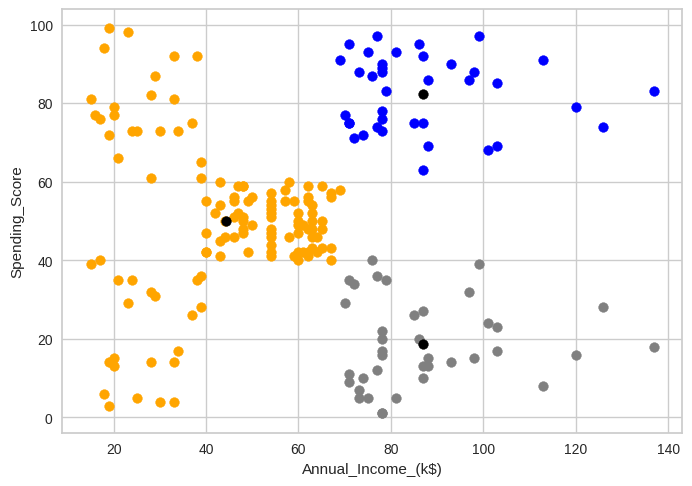

In [21]:
color=['grey','blue','orange']
for k in range(K):
   data=X[X["Cluster"]==k+1]
   plt.scatter(data["Annual_Income_(k$)"],data["Spending_Score"],c=color[k])
plt.scatter(centroids["Annual_Income_(k$)"],centroids["Spending_Score"],c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

That was quite a lot of code and the algorithm might also need some optimization to improve its run time. To avoid enhancing the algorithm and writing it all over again, we can use open-source library functions. Scikit Learn has a clustering package that includes a K-means function which is optimized and very popular among researchers.

In [22]:
from sklearn.cluster import  KMeans #import kmeans
km_sample = KMeans(n_clusters= 3 ) #use if for k = 3
km_sample.fit(customer_data[["Annual_Income_(k$)" , "Spending_Score" ]]) # we need to give it two features: Annual income and spending

KMeans(n_clusters=3)

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

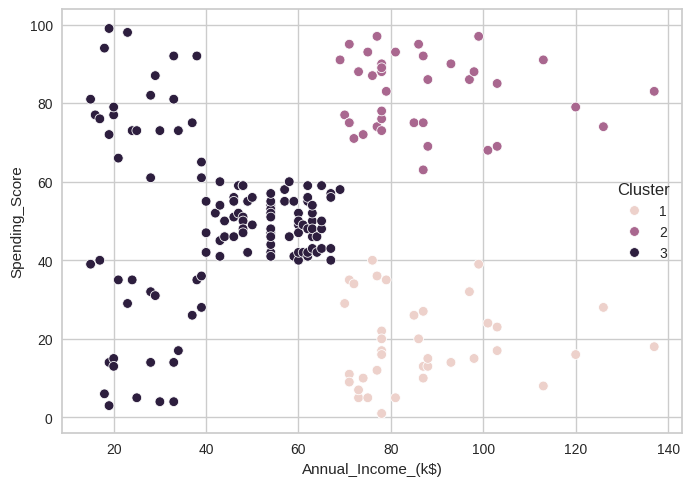

In [23]:
import seaborn as sns #we use sns framework to display the heat map for the resu;lts
labels_sample = km_sample.labels_
customer_data['label'] = labels_sample
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=X)

How to choose K?
Some factors can challenge the efficacy of the final output of the K-means clustering algorithm and one of them is finalizing the number of clusters(K). Selecting a lower number of clusters will result in underfitting while specifying a higher number of clusters can result in overfitting. Unfortunately, there is no definitive way to find the optimal number.

The optimal number of clusters depends on the similarity measures and the parameters used for clustering. So, to find the number of clusters in the data, we need to run the k-means clustering for a range of values and compare the outcomes. At present, we don’t have any method to determine the exact accurate value of clusters K but we can estimate the value using some techniques, including Cross-validation, Elbow method, Information Criteria, the Silhouette method, and the G-means algorithm.

Elbow method
“The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.” Resource )

Perform K-means clustering with all the K values. For each K value, we compute the average distance to the centroid across all the data points:

other way to compute

In [28]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#creating sample data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]) #Annual Income
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]) #Spending Score
#Here, two arrays x1 and x2 are defined, representing two features of the data points.
# These arrays are then combined into a 2D array X using the zip function and reshaped
# to the appropriate dimensions.
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [29]:
# k means determine k
distortions = [] #it's the cost function value that we need to calculate
K = range(1,10) #test it on 10 iterations
for k in K:
   kmeanModel = KMeans(n_clusters=k) #calculate kmeans
   kmeanModel.fit(X)
   #The cdist function computes the Euclidean distance between each data point and the cluster centers.
   # The np.min function finds the minimum distance for each point, and the sum of these minimum distances is computed.
   distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [30]:
distortions

[3.4577032384495707,
 1.7687413573405673,
 0.8819889697423957,
 0.7587138847606585,
 0.6635212812400347,
 0.6120367291529077,
 0.5499674461763038,
 0.4442520441076937,
 0.35294117647058815]

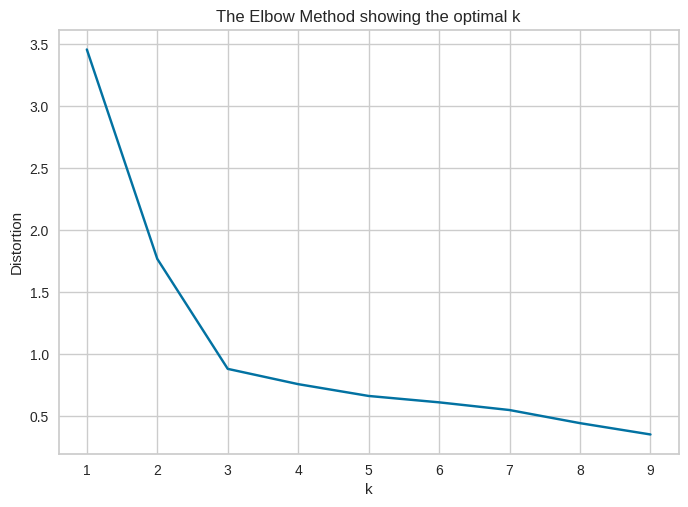

In [31]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

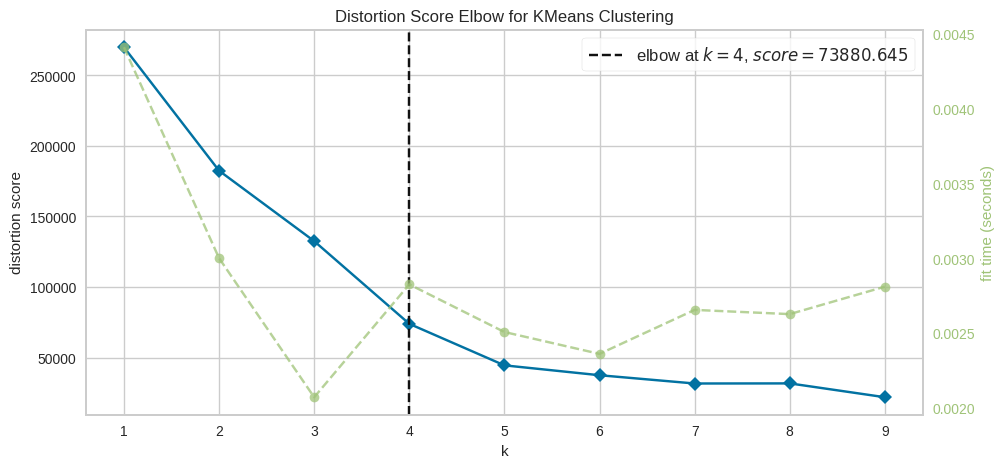

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

df= customer_data
# Step 2: Select the features for clustering
X = df[["Annual_Income_(k$)", "Spending_Score"]].values  # Use the relevant columns

# Step 3: Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), size=(1080, 500))

# Step 4: Fit the data to the visualizer
visualizer.fit(X)

# Step 5: Show the visualizer
visualizer.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

df = customer_data
X = df[['Annual_Income_(k$)', 'Spending_Score']]  # Select relevant features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(random_state=42)  # Add random_state for reproducibility
visualizer = KElbowVisualizer(model, k=(1, 10), size=(1080, 500))

visualizer.fit(X_scaled)  # Fit with scaled data
visualizer.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load your DataFrame
# Replace 'your_dataset.csv' with the path to your actual dataset
df = customer_data

# Step 2: Extract the relevant features for clustering
x1 = df["Annual_Income_(k$)"].values  # Annual Income
x2 = df["Spending_Score"].values       # Spending Score

# Combine the two features into a 2D array
X = np.array(list(zip(x1, x2)))

# Now you can proceed with K-Means clustering or any other analysis

In [ ]:
# Step 3: Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
kmeans.fit(X)

# Step 4: Get the cluster labels
labels = kmeans.labels_

# Step 5: Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load your DataFrame
# Replace 'your_dataset.csv' with the path to your actual dataset
df = customer_data

# Step 2: Extract the relevant features for clustering
X = df[["Annual_Income_(k$)", "Spending_Score"]].values  # Use the relevant columns

# Step 3: Initialize a list to store the inertia values
inertia = []

# Step 4: Fit K-Means for a range of k values
k_values = range(1, 11)  # Testing k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Store the inertia value

# Step 5: Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

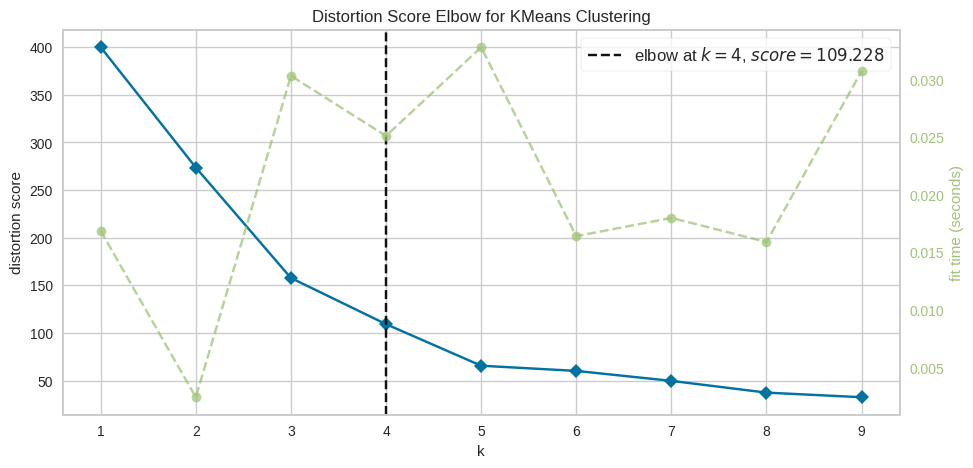

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Step 1: Load data
df = customer_data

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["Annual_Income_(k$)", "Spending_Score"]])

# Step 3: Instantiate the clustering model and visualizer
model = KMeans(random_state=42)  # Set random state for reproducibility
visualizer = KElbowVisualizer(model, k=(1, 10), size=(1080, 500))

# Step 4: Fit the visualizer
visualizer.fit(X_scaled)

# Step 5: Show the visualizer
visualizer.show()


In [34]:
from sklearn.metrics import silhouette_score

# Test k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(X_scaled)
silhouette_3 = silhouette_score(X_scaled, labels_3)

# Test k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(X_scaled)
silhouette_4 = silhouette_score(X_scaled, labels_4)

print(f"Silhouette Score for k=3: {silhouette_3}")
print(f"Silhouette Score for k=4: {silhouette_4}")


Silhouette Score for k=3: 0.46658474419000145
Silhouette Score for k=4: 0.49434988482196784


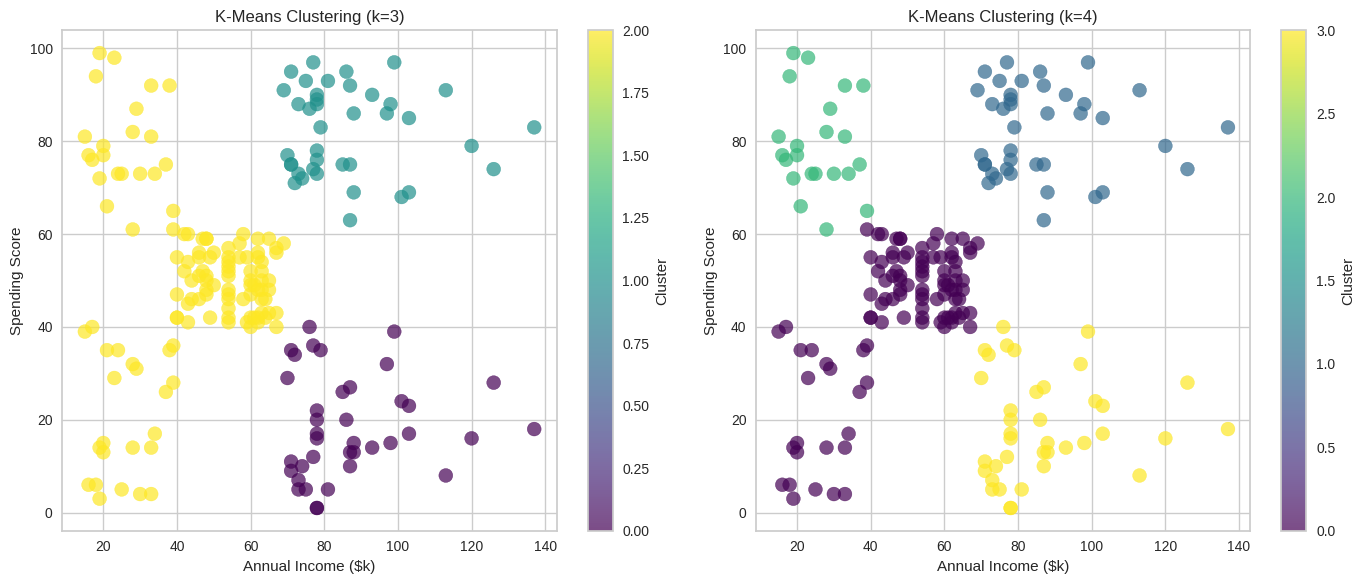

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset and scale the features
df = customer_data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["Annual_Income_(k$)", "Spending_Score"]])

# Fit KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_k3'] = kmeans_3.fit_predict(X_scaled)

# Fit KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_k4'] = kmeans_4.fit_predict(X_scaled)

# Create a plot for k=3
plt.figure(figsize=(14, 6))

# Plot k=3 clusters
plt.subplot(1, 2, 1)
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['Cluster_k3'], cmap='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')

# Plot k=4 clusters
plt.subplot(1, 2, 2)
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['Cluster_k4'], cmap='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering (k=4)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


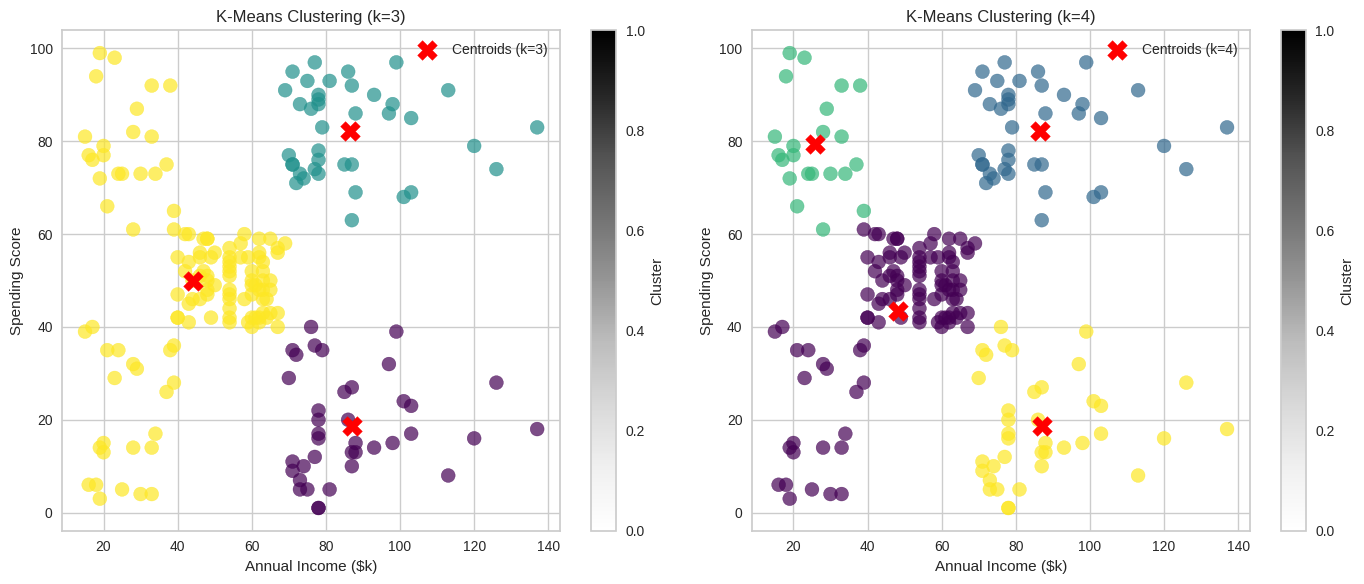

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset and scale the features
df = customer_data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["Annual_Income_(k$)", "Spending_Score"]])

# Fit KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_k3'] = kmeans_3.fit_predict(X_scaled)

# Fit KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_k4'] = kmeans_4.fit_predict(X_scaled)

# Inverse the scaling for centroids to original feature space
centroids_k3 = scaler.inverse_transform(kmeans_3.cluster_centers_)
centroids_k4 = scaler.inverse_transform(kmeans_4.cluster_centers_)

# Create a plot for k=3
plt.figure(figsize=(14, 6))

# Plot k=3 clusters and centroids
plt.subplot(1, 2, 1)
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['Cluster_k3'], cmap='viridis', s=100, alpha=0.7)
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 1], c='red', marker='X', s=200, label='Centroids (k=3)')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.legend()

# Plot k=4 clusters and centroids
plt.subplot(1, 2, 2)
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['Cluster_k4'], cmap='viridis', s=100, alpha=0.7)
plt.scatter(centroids_k4[:, 0], centroids_k4[:, 1], c='red', marker='X', s=200, label='Centroids (k=4)')
plt.title('K-Means Clustering (k=4)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.legend()

plt.tight_layout()
plt.show()


Centroids for k=3: [[ 1.00919971 -1.22553537]
 [ 0.99158305  1.23950275]
 [-0.62618966 -0.01439238]]
Centroids for k=4: [[-0.47298347 -0.26414036]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.00919971 -1.22553537]]


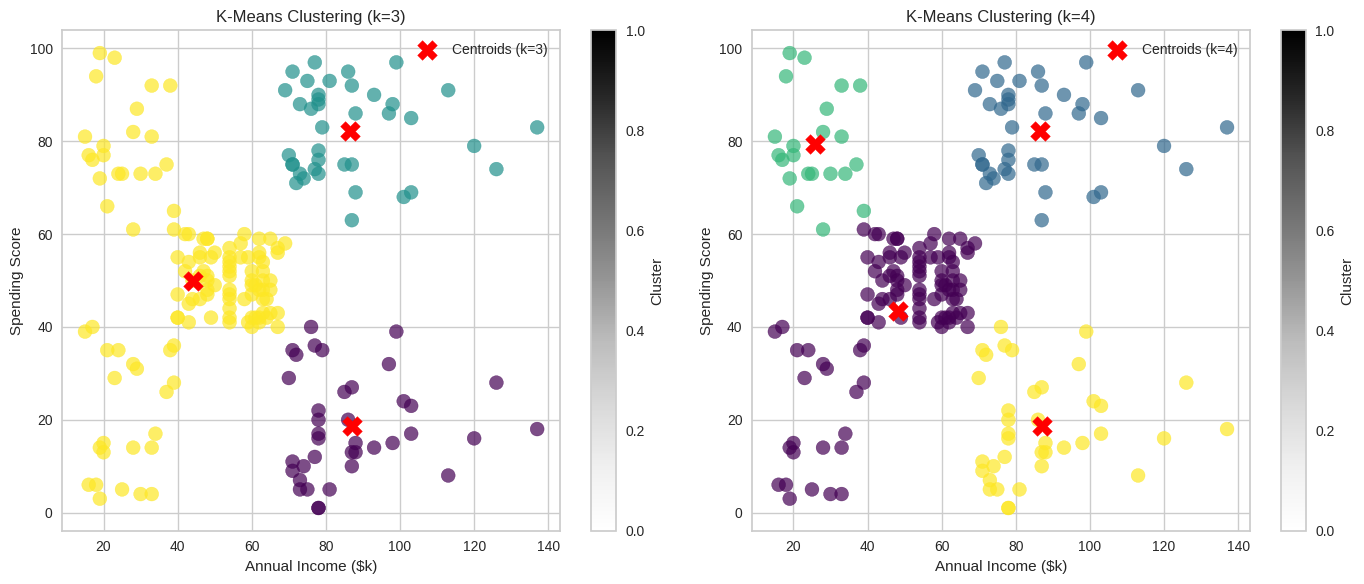

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset
df = customer_data

# Scaling the features before applying KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["Annual_Income_(k$)", "Spending_Score"]])

# Apply KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_k3'] = kmeans_3.fit_predict(X_scaled)

# Apply KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_k4'] = kmeans_4.fit_predict(X_scaled)

# Check number of centroids for both k=3 and k=4
print(f"Centroids for k=3: {kmeans_3.cluster_centers_}")
print(f"Centroids for k=4: {kmeans_4.cluster_centers_}")

# Inverse the scaling for centroids to original feature space
centroids_k3 = scaler.inverse_transform(kmeans_3.cluster_centers_)
centroids_k4 = scaler.inverse_transform(kmeans_4.cluster_centers_)

# Create a plot for k=3
plt.figure(figsize=(14, 6))

# Plot k=3 clusters and centroids
plt.subplot(1, 2, 1)
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['Cluster_k3'], cmap='viridis', s=100, alpha=0.7)
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 1], c='red', marker='X', s=200, label='Centroids (k=3)')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.legend()

# Plot k=4 clusters and centroids
plt.subplot(1, 2, 2)
plt.scatter(df['Annual_Income_(k$)'], df['Spending_Score'], c=df['Cluster_k4'], cmap='viridis', s=100, alpha=0.7)
plt.scatter(centroids_k4[:, 0], centroids_k4[:, 1], c='red', marker='X', s=200, label='Centroids (k=4)')
plt.title('K-Means Clustering (k=4)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
import numpy as np

# Define the new data point
new_data_point = np.array([[12,3]])

# Predict the cluster for the new data point
new_data_cluster = kmeans.predict(new_data_point)
print(f'New data point belongs to cluster: {new_data_cluster[0]}')

New data point belongs to cluster: 0
